In [1]:
# 01_EDA_FraudData.ipynb
# Adding project root to Python path
import sys
import os
sys.path.append(os.path.abspath(".."))

# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_preprocessing import load_fraud_data, clean_fraud_data, merge_with_geolocation
from src.feature_engineering import create_time_features, calculate_transaction_frequency

# 📌 Configure plotting
sns.set(style="whitegrid")
%matplotlib inline

# 🕵️‍♀️ Exploratory Data Analysis (EDA) on Fraud Detection Dataset

This notebook performs EDA on the fraud transaction dataset after preprocessing and feature engineering. We analyze transaction patterns across time, amount, class labels, and geolocation to uncover fraud trends.

In [2]:
df = load_fraud_data()
print(df.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


In [3]:
# 📥 Load and Clean Data
df = load_fraud_data()
df_clean = clean_fraud_data(df)
df_merged = merge_with_geolocation(df_clean)
df_features = create_time_features(df_merged)
df_final = calculate_transaction_frequency(df_features)

# Preview cleaned dataset
df_final.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_integer,lower_bound_ip_address,upper_bound_ip_address,country,hour_of_day,day_of_week,time_since_signup,transaction_count
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778864,16778240,16779263,Australia,3,6,3632215.0,1
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16842045,16809984,16842751,Thailand,20,2,1231637.0,1
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843656,16843264,16843775,China,23,5,1997534.0,1
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16938732,16924672,16941055,China,16,5,7640897.0,1
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16971984,16941056,16973823,Thailand,4,1,10249579.0,1


## 1. Class Distribution (Fraud vs Legitimate)

Let's check if the dataset is imbalanced between fraud (1) and legitimate (0) transactions.

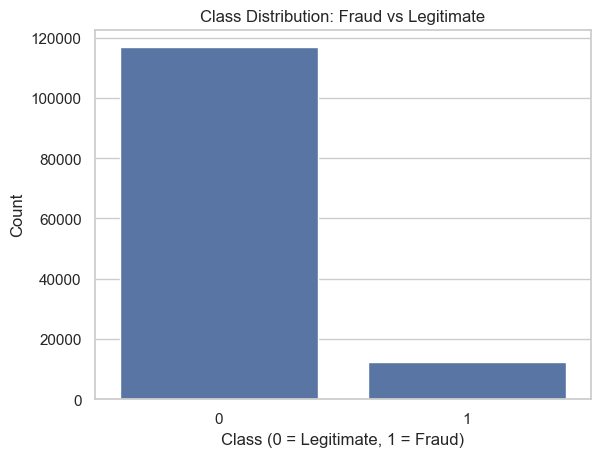

In [4]:
sns.countplot(data=df_final, x='class')
plt.title("Class Distribution: Fraud vs Legitimate")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

🔍 **Observation**: The dataset is heavily imbalanced, with far fewer fraudulent transactions. This confirms the need for sampling strategies (like SMOTE) during model training.

## 2. Transaction Amount Distribution by Class

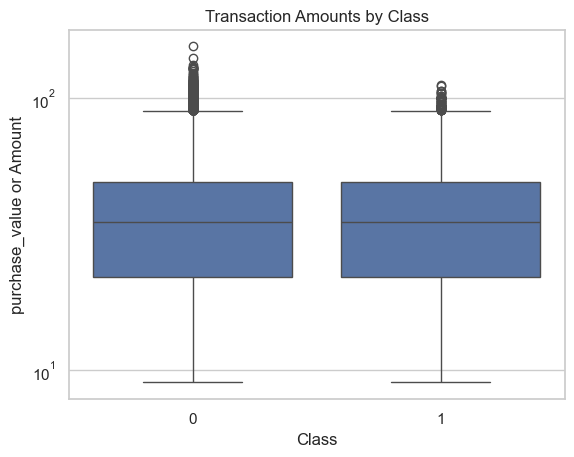

In [7]:
sns.boxplot(data=df_final, x='class', y='purchase_value')
plt.title("Transaction Amounts by Class")
plt.xlabel("Class")
plt.ylabel("purchase_value or Amount")
plt.yscale('log')  # To better show the spread
plt.show()

🔍 **Insight**: Fraudulent transactions often have larger amounts or wider variance. The log scale helps visualize outliers and scale differences.

## 3. Time-based Patterns: Hour of Day

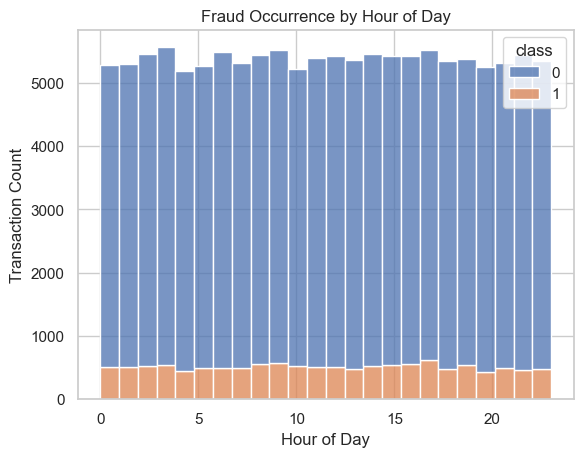

In [8]:
sns.histplot(data=df_final, x='hour_of_day', hue='class', multiple='stack', bins=24)
plt.title("Fraud Occurrence by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show()

🔍 **Insight**: Fraud tends to spike during early morning and late-night hours, which may reflect reduced vigilance 
or automated attacks.

## 4. Day of Week Pattern

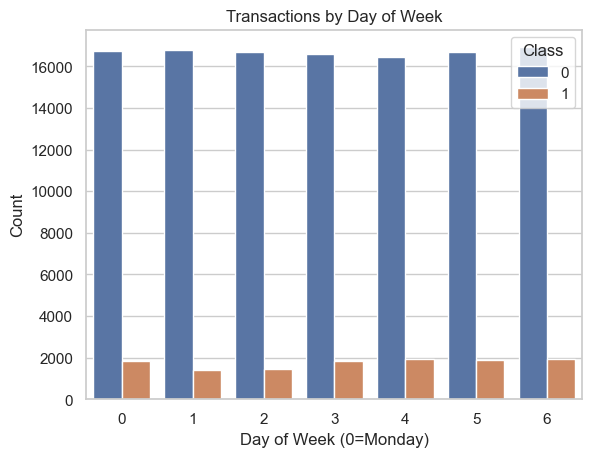

In [10]:
sns.countplot(data=df_final, x='day_of_week', hue='class')
plt.title("Transactions by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()

🔍 **Insight**: Fraud patterns may vary by day, possibly linked to user behavior, payday effects, or targeted campaigns.

## 5. Country-wise Fraud Distribution (Top 10)

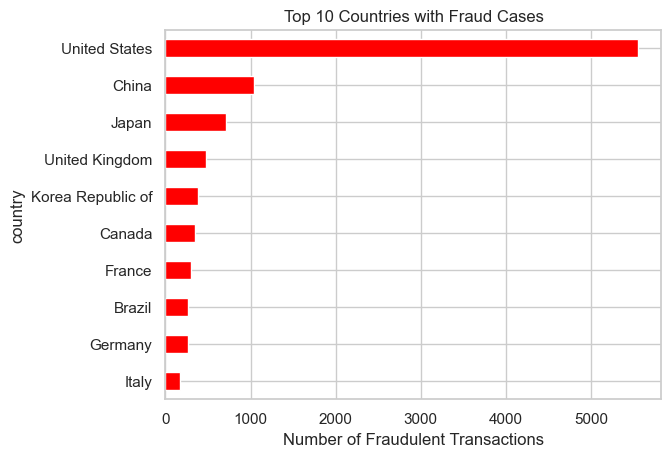

In [11]:
top_countries = df_final[df_final['class'] == 1]['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='red')
plt.title("Top 10 Countries with Fraud Cases")
plt.xlabel("Number of Fraudulent Transactions")
plt.gca().invert_yaxis()
plt.show()

🔍 **Insight**: A few countries dominate the fraudulent activity, indicating potential hotspots for attacks.

## 6. Correlation Heatmap (Optional)

In [15]:
print(df_final.columns.tolist())

['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class', 'ip_integer', 'lower_bound_ip_address', 'upper_bound_ip_address', 'country', 'hour_of_day', 'day_of_week', 'time_since_signup', 'transaction_count']


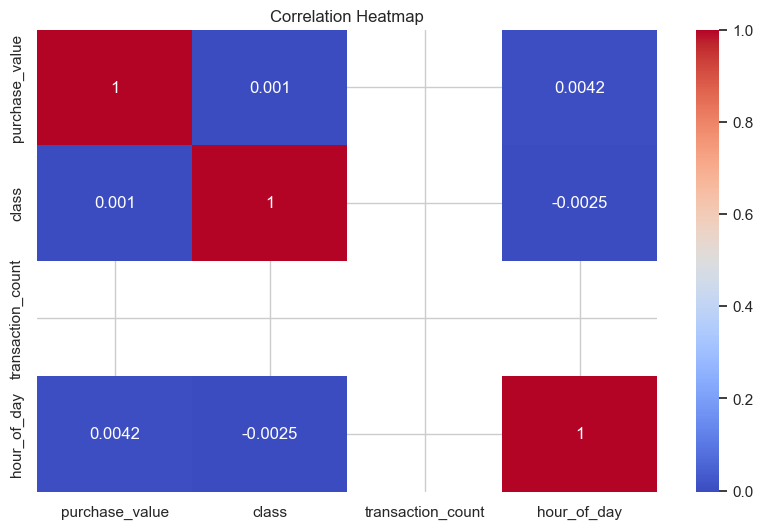

In [16]:
plt.figure(figsize=(10, 6))
corr = df_final[['purchase_value', 'class', 'transaction_count', 'hour_of_day']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

🔍 **Insight**: Features like transaction frequency and amount may have weak-to-moderate correlation with fraud, suggesting room for feature engineering or deeper learning models.

In [ ]:
# 💾 Saving Final Processed Data
df_final.to_csv("data/processed/cleaned_fraud_data.csv", index=False)
print("✅ Final cleaned dataset saved to: data/processed/cleaned_fraud_data.csv")

# ✅ Summary

- Dataset is **highly imbalanced**, requiring care in model training
- Fraudulent transactions may have **higher value and frequency**
- Time of day and country of origin show **distinct fraud patterns**
- Dataset is now ready for **model training and evaluation**